In [27]:
import requests
import copy
import json
import math
from pprint import pprint

In [28]:
class Node(object):
  
    def __init__(self, parent=None, moves=None, state=None):
        self.parent = parent
        self.moves = moves
        self.state = state

        self.function = 0
        self.degree = 0
        self.heuristic = 0
    
    def calculate_function(self):
        return self.degree * self.heuristic

    def __eq__(self, other):
        return self.state == other

In [29]:
class Maze(object):
  
    def __init__(self, start_position, end_position, map_, height, length, endpoint):
        self.start_position = start_position[::-1]
        self.end_position = end_position[::-1]
        self.map_ = map_
        self.height = height
        self.length = length

        self.endpoint = endpoint

In [120]:
def possible_moves(node, maze):
    possible_nodes = list()

    current_position = node.moves[-1]

    left_x, up_x, right_x, down_x = current_position[0], current_position[0] - 1, current_position[0], current_position[0] + 1
    left_y, up_y, right_y, down_y = current_position[1] - 1, current_position[1], current_position[1] + 1, current_position[1]

    if up_x >= 0 and up_x < maze.height:
        if maze.map_[up_x][up_y] != 'X':
            if [up_x, up_y] not in node.moves:
                new_moves = copy.deepcopy(node.moves)
                new_moves.append([up_x, up_y])

                new_node = Node(node, new_moves, node.state + 'N')

                new_node.degree = node.degree + 1
                new_node.heuristic = euclidean_distance([up_x, up_y], maze.end_position)
                # new_node.heuristic = bartolomean_distance([up_x, up_y], maze.end_position, maze)

                new_node.function = new_node.calculate_function()

                possible_nodes.append(new_node)

    if left_y >= 0 and left_y < maze.length:
        if maze.map_[left_x][left_y] != 'X':
            if [left_x, left_y] not in node.moves:
                new_moves = copy.deepcopy(node.moves)
                new_moves.append([left_x, left_y])

                new_node = Node(node, new_moves, node.state + 'W')

                new_node.degree = node.degree + 1
                new_node.heuristic = euclidean_distance([left_x, left_y], maze.end_position)
                # new_node.heuristic = bartolomean_distance([left_x, left_y], maze.end_position, maze)

                new_node.function = new_node.calculate_function()

                possible_nodes.append(new_node)

    if right_y >= 0 and right_y < maze.length:
        if maze.map_[right_x][right_y] != 'X':
            if [right_x, right_y] not in node.moves:
                new_moves = copy.deepcopy(node.moves)
                new_moves.append([right_x, right_y])

                new_node = Node(node, new_moves, node.state + 'E')

                new_node.degree = node.degree + 1
                new_node.heuristic = euclidean_distance([right_x, right_y], maze.end_position)
                # new_node.heuristic = bartolomean_distance([right_x, right_y], maze.end_position, maze)

                new_node.function = new_node.calculate_function()

                possible_nodes.append(new_node)

    if down_x >= 0 and down_x < maze.height:
        if maze.map_[down_x][down_y] != 'X':
            if [down_x, down_y] not in node.moves:
                new_moves = copy.deepcopy(node.moves)
                new_moves.append([down_x, down_y])

                new_node = Node(node, new_moves, node.state + 'S')

                new_node.degree = node.degree + 1
                new_node.heuristic = euclidean_distance([down_x, down_y], maze.end_position)
                # new_node.heuristic = bartolomean_distance([down_x, down_y], maze.end_position, maze)

                new_node.function = new_node.calculate_function()

                possible_nodes.append(new_node)

    return possible_nodes

In [121]:
def euclidean_distance(current_position, end_position):
    x = end_position[0] - current_position[0]
    y = end_position[1] - current_position[1]

    return math.sqrt((x*x) + (y*y))

In [122]:
def manhattan_distance(current_position, end_position):
    x = end_position[0] - current_position[0]
    y = end_position[1] - current_position[1]
    
    return abs(x) + abs(y)

In [123]:
def davidean_distance(current_position, end_position):
    return 1

In [124]:
def bartolomean_distance(current_position, end_position, maze):
    visitable_cells = 0
    not_visitable_cells = 0
    
    max_x = max(current_position[0], end_position[0])
    min_x = min(current_position[0], end_position[0])
    
    x_diff = max_x - min_x
    
    max_y = max(current_position[1], end_position[1])
    min_y = min(current_position[1], end_position[1])
    
    y_diff = max_y - min_y
    
    if x_diff == 0:
        for y in range(min_y, max_y + 1, 1):
            if maze.map_[min_x][y] == 'X':
                not_visitable_cells += 1
            else:
                visitable_cells += 1
    elif y_diff == 0:
        for x in range(min_x, max_x + 1, 1):
            if maze.map_[x][min_y] == 'X':
                not_visitable_cells += 1
            else:
                visitable_cells += 1
    else:
        for x in range(min_x, max_x + 1, 1):
            for y in range(min_y, max_y + 1, 1):
                if maze.map_[x][y] == 'X':
                    not_visitable_cells += 1
                else:
                    visitable_cells += 1
                
    return not_visitable_cells/visitable_cells

In [125]:
def calculate_heuristic(current_position, end_position):
    x = 0
    y = 0

    x = end_position[0] - current_position[0]
    y = end_position[1] - current_position[1]

    return math.sqrt((x*x) + (y*y))

In [126]:
def a_star(maze):
    visited_nodes = list()
    visitable_nodes = list()

    initial_node = Node(None, [maze.start_position], '')

    visitable_nodes.append(initial_node)

    while len(visitable_nodes) > 0:
        current_node = visitable_nodes[0]

        visitable_nodes.remove(current_node)
        visited_nodes.append(current_node)

        if current_node.moves[-1] == maze.end_position:
            return current_node

        possible_nodes = possible_moves(current_node, maze)

        if possible_nodes:
            for possible_node in possible_nodes:
                insertion_index = len(visitable_nodes)

                for index, node in enumerate(visitable_nodes):
                    if possible_node.function < node.function:
                        insertion_index = index
                        break

                visitable_nodes.insert(insertion_index, possible_node)

In [127]:
def post_solution(solution):
    url = 'https://api.noopschallenge.com' + maze.endpoint

    data = {
      "directions": result.state
    }

    final = requests.post(url, json.dumps(data))

    return final.elapsed

In [138]:
def solve():
    req = requests.get("https://api.noopschallenge.com/mazebot/random?minSize=80&maxSize=80")

    response = json.loads(req.text)

    maze = Maze(response['startingPosition'], response['endingPosition'], response['map'], len(response['map']), len(response['map'][0]), response['mazePath'])

    %time result = a_star(maze)
    
    elpased_time = post_solution(result.state)

    return elpased_time.total_seconds()

In [139]:
bartolomean_heuristic = list()
euclidean_heuristic = list()
manhattan_heuristic = list()

In [ ]:
for _ in range(10):
    resulting_time = solve()
    
    euclidean_heuristic.append(resulting_time)

CPU times: user 16.6 s, sys: 364 ms, total: 16.9 s
Wall time: 17.8 s



KeyboardInterrupt



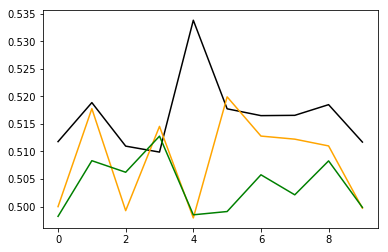

In [132]:
import matplotlib.pyplot as plt

plt.plot(bartolomean_heuristic, color='black')
plt.plot(manhattan_heursitic, color='orange')
plt.plot(euclidean_heuristic, color='green')
plt.show()

In [80]:
req = requests.get("https://api.noopschallenge.com/mazebot/random?minSize=20&maxSize=20")

response = json.loads(req.text)

maze = Maze(response['startingPosition'], response['endingPosition'], response['map'], len(response['map']), len(response['map'][0]), response['mazePath'])

%time result = a_star(maze)

post_solution(result)

CPU times: user 359 ms, sys: 5.84 ms, total: 365 ms
Wall time: 368 ms
{"result":"success","message":"You solved it in 0.887 seconds with 93 steps, the shortest possible solution.","shortestSolutionLength":93,"yourSolutionLength":93,"elapsed":887}


In [77]:
print(maze.height, maze.length)

10 10
